   TERMINALNO  speed_tripmean_mean  speed_tripmean_max  speed_tripmax_mean  \
0           1            14.819857           32.476667           18.645111   
1           2             3.850738           26.009286            6.780909   
2           3             7.161065           13.425942           15.521351   
3           4             6.176600           16.111333           10.970918   
4           5             6.401703           32.544444           11.476118   

   speed_tripmax_max    Y  trip_num  
0          32.779999  0.0        45  
1          36.119999  0.0        66  
2          25.440001  0.0        37  
3          33.310001  0.0        98  
4          53.480000  0.0        85  


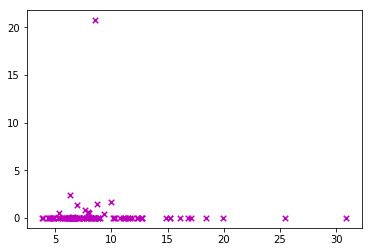

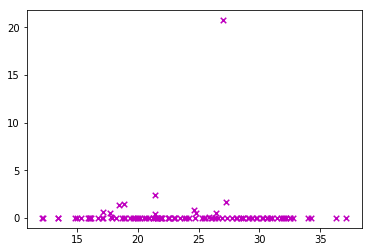

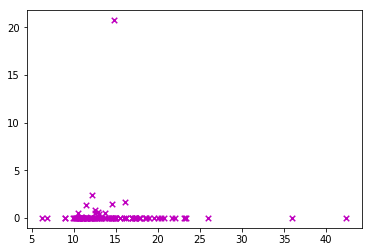

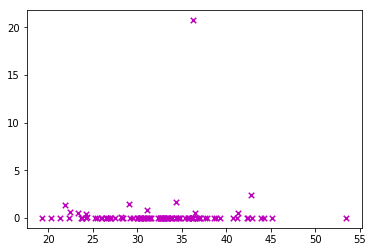

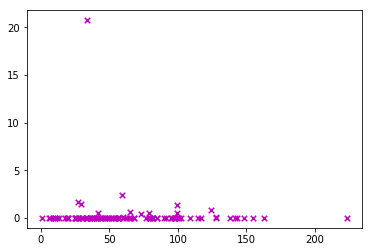

In [42]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt  

train_path=r'C:\Users\miya\Documents\GitHub\pingan\PINGAN-2018-train_demo.csv'
train=pd.read_csv(train_path)
train.head()

train['TIME_Tsfd']=0

train['TIME_Tsfd']=train['TIME'].apply(lambda x:datetime.datetime.fromtimestamp(x))

train['TIME_Tsfd']=pd.to_datetime(train['TIME_Tsfd'])
train['Month']=train['TIME_Tsfd'].dt.month
train['hour']=train['TIME_Tsfd'].dt.hour
train['week_of_year']=train['TIME_Tsfd'].dt.weekofyear
train['day_of_week']=train['TIME_Tsfd'].dt.dayofweek

train.head()

#计算每个用户，每个trip_id的平均速度
train_speed_grouped=train.groupby(['TERMINALNO','TRIP_ID'])['SPEED'].agg(['mean','max'])
train_speed_grouped.reset_index(inplace=True)
train_speed_grouped_1=train_speed_grouped.groupby('TERMINALNO')['mean'].agg(['mean','max'])
train_speed_grouped_2=train_speed_grouped.groupby('TERMINALNO')['max'].agg(['mean','max'])
train_speed_grouped_1.reset_index(inplace=True)
train_speed_grouped_2.reset_index(inplace=True)
train_speed_grouped_3=train.groupby('TERMINALNO')['Y'].agg(['mean'])
train_speed_grouped_3.reset_index(inplace=True)
train_speed_grouped_3.rename(columns={'mean':'Y'},inplace=True)

temp=pd.merge(train_speed_grouped_1,train_speed_grouped_2,on='TERMINALNO',how='left')
temp=pd.merge(temp,train_speed_grouped_3,on='TERMINALNO',how='left')
temp.rename(columns={'mean_x':'speed_tripmean_mean','mean_y':'speed_tripmax_mean',
                    'max_x':'speed_tripmean_max','max_y':'speed_tripmax_max'},inplace=True)
#统计每个用户的trip数
train_trip_numed=train.groupby(['TERMINALNO'])['TRIP_ID'].agg(['max'])
train_trip_numed.reset_index(inplace=True)
train_trip_numed.rename(columns={'max':'trip_num'},inplace=True)
temp=pd.merge(temp,train_trip_numed,on='TERMINALNO',how='left')
                 
print(temp.head())
plt.figure(1)  
plt.scatter(temp['speed_tripmean_mean'],temp['Y'], marker = 'x', color = 'm', label='1', s = 30)
plt.figure(2)  
plt.scatter(temp['speed_tripmean_max'],temp['Y'], marker = 'x', color = 'm', label='1', s = 30)
plt.figure(3)  
plt.scatter(temp['speed_tripmax_mean'],temp['Y'], marker = 'x', color = 'm', label='1', s = 30)
plt.figure(4)  
plt.scatter(temp['speed_tripmax_max'],temp['Y'], marker = 'x', color = 'm', label='1', s = 30)
plt.figure(5)  
plt.scatter(temp['trip_num'],temp['Y'], marker = 'x', color = 'm', label='1', s = 30)
plt.show()



In [43]:
train_hour_num=train.groupby(['TERMINALNO','hour'])['TRIP_ID'].agg(['count'])
train_hour_num.reset_index(inplace=True)
train_trip_sum=train.groupby('TERMINALNO')['TRIP_ID'].agg(['count'])
train_trip_sum.reset_index(inplace=True)
train_hour_num=pd.merge(train_hour_num,train_trip_sum,on='TERMINALNO',how='left')
train_hour_num['count_ratio']=train_hour_num['count_x']/train_hour_num['count_y']

for i in range(0,24):
    train_hour_num[i]=0
hour_state=np.zeros([len( train_hour_num['TERMINALNO'].unique()),24])
for i in train_hour_num['TERMINALNO'].unique():
    train_hour_num_item = train_hour_num.loc[train_hour_num['TERMINALNO'] == i,:]
    for j in range(24):
        if j in list(train_hour_num_item['hour']):
            hour_state[i-1][j]=train_hour_num_item['count_ratio'].loc[train_hour_num_item['hour'] == j]
hour_state_df=pd.DataFrame(hour_state,columns=['h'+str(i) for i in range(0,24)])
hour_state_df['TERMINALNO']=range(1,len(train_hour_num['TERMINALNO'].unique())+1)
temp=pd.merge(temp,hour_state_df,on='TERMINALNO',how='left')



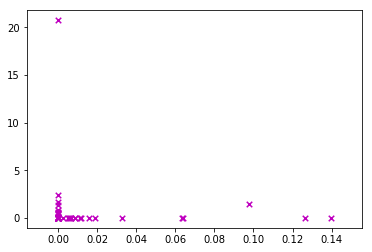

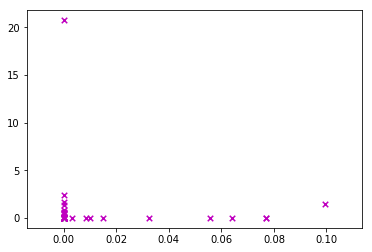

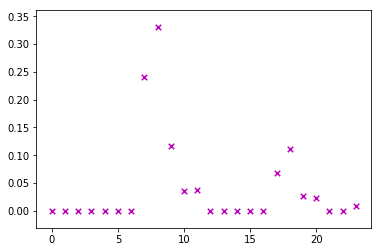

,TERMINALNO,speed_tripmean_mean,speed_tripmean_max,speed_tripmax_mean,speed_tripmax_max,Y,trip_num,h0,h1,h2,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
0,1,14.819857,32.476667,18.645111,32.779999,0.000000,45,0.139456,0.010204,0.000000,...,0.000000,0.000000,0.027211,0.023810,0.159864,0.000000,0.085034,0.122449,0.187075,0.142857
1,2,3.850738,26.009286,6.780909,36.119999,0.000000,66,0.126374,0.076923,0.000000,...,0.104396,0.071429,0.174451,0.119505,0.021978,0.000000,0.057692,0.001374,0.000000,0.000000
2,3,7.161065,13.425942,15.521351,25.440001,0.000000,37,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.068536,0.111111,0.025961,0.023884,0.000000,0.000000,0.009346
3,4,6.176600,16.111333,10.970918,33.310001,0.000000,98,0.000000,0.000000,0.000000,...,0.040404,0.032828,0.000000,0.036616,0.051768,0.046717,0.022727,0.130051,0.125000,0.000000
4,5,6.401703,32.544444,11.476118,53.480000,0.000000,85,0.000000,0.000000,0.000000,...,0.100775,0.111849,0.141750,0.098560,0.050941,0.022148,0.066445,0.019934,0.000000,0.000000
5,6,7.757277,20.138846,14.398250,29.570000,0.000000,40,0.000000,0.000000,0.000000,...,0.077406,0.098326,0.104603,0.016736,0.209205,0.000000,0.029289,0.018828,0.000000,0.000000
6,7,4.796291,22.012955,9.027029,35.680000,0.000000,138,0.000000,0.000000,0.000000,...,0.015141,0.032347,0.033035,0.066758,0.000000,0.000000,0.000688,0.002753,0.000000,0.000000
7,8,6.296452,21.392881,12.140907,42.720001,2.368560,59,0.000000,0.000000,0.000000,...,0.077364,0.134670,0.040115,0.120344,0.118911,0.018625,0.035817,0.000000,0.000000,0.000000
8,9,10.128710,21.545151,20.062222,35.680000,0.000000,9,0.000000,0.000000,0.000000,...,0.000000,0.160883,0.132492,0.000000,0.000000,0.047319,0.006309,0.022082,0.000000,0.000000
9,10,6.259380,17.098462,13.667895,32.330002,0.000000,57,0.032609,0.000000,0.000000,...,0.007764,0.043478,0.057453,0.242236,0.144410,0.031056,0.059006,0.000000,0.099379,0.000000


In [49]:
plt.figure(6)  
plt.scatter(temp['h0'],temp['Y'], marker = 'x', color = 'm', label='1', s = 30)
plt.figure(7)  
plt.scatter(temp['h1'],temp['Y'], marker = 'x', color = 'm', label='1', s = 30)
plt.figure(8)  
plt.scatter(list(range(24)),[temp['h'+str(i)].iloc[2] for i in range(0,24)], marker = 'x', color = 'm', label='1', s = 30)
plt.show()

temp

